# Import Packages

In [72]:
import os
import gpxpy
import gpxpy.gpx
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt
from datetime import datetime

# Convert and Calculate

In [67]:
def GPX_to_GeoDataFrame(gpx_file,CRS='EPSG:4326'):
    Point_Layer = {
    'Lat':[],
    'Lon':[],
    'Z':[],
    'Time':[],
    'HR':[]
    }
    gpx_file = open(gpx_file,'r')
    gpx = gpxpy.parse(gpx_file)
    for track in gpx.tracks:
        for segment in track.segments:
            for point in segment.points:
                Point_Layer['Lat'].append(point.latitude)
                Point_Layer['Lon'].append(point.longitude)
                Point_Layer['Z'].append(point.elevation)
                Point_Layer['Time'].append(point.time)
                for ext in point.extensions:
                    for extchild in list(ext):
                        if extchild.tag[-2:] == 'hr':
                            Point_Layer['HR'].append(extchild.text)
                            
    df = pd.DataFrame(Point_Layer)

    Points = gpd.GeoDataFrame(df,
                           geometry=gpd.points_from_xy(df['Lon'],df['Lat']),
                           crs='EPSG:4326'
                           )
    Points = Points.to_crs(CRS)
    
    Points['Time'] = pd.DatetimeIndex(Points['Time'])
    Points['Seconds']=Points['Time'].diff().dt.seconds
    Points['Net_Elevation']=Points['Z'].diff()
    Points2 = Points.shift()
    Points['Key']=Points.index
    Points2['Key']=Points2.index
    Points_to_Lines=Points.append(Points2)
    Points_to_Lines=Points_to_Lines.sort_values(by='Key')
    Temp = Points_to_Lines[2:].groupby('Key').geometry.apply(lambda x: LineString(x.tolist()))
    Lines = Points_to_Lines[2:].copy()
    Lines.geometry=Temp
    Lines['Distance']=Lines.length
    Lines['Speed']=Lines['Distance']/Lines['Seconds']
    Lines=Lines.drop(['Time','Lat','Lon'],axis=1)
    return(Lines)

# Read and Save Files

C:\Users\User\AppData\Local\Temp/ipykernel_14276/3377635131.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Lines.to_file('Outputs/'+f.split('.')[0]+'.shp')


0:00:05.624580


<AxesSubplot:>

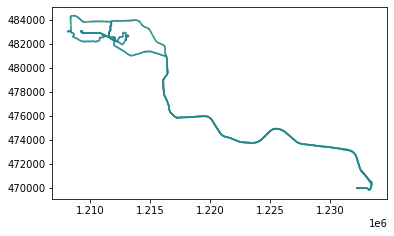

In [73]:
T1 = datetime.now()
for path,dirs,files in os.walk('Inputs/'):
    for f in files:
        gpx_file = path+f
        Lines=GPX_to_GeoDataFrame(gpx_file,CRS='EPSG:3005')
        Lines.to_file('Outputs/'+f.split('.')[0]+'.shp')
print(datetime.now()-T1)    
Lines.plot(column='Net_Elevation')

In [53]:
Lines.columns

Index(['Lat', 'Lon', 'Z', 'Time', 'HR', 'geometry', 'Seconds', 'Key',
       'Distance', 'Speed'],
      dtype='object')

In [2]:


# Parsing an existing file:
# -------------------------



for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            print('Point at ({0},{1}) -> {2}'.format(point.latitude, point.longitude, point.elevation))

for waypoint in gpx.waypoints:
    print('waypoint {0} -> ({1},{2})'.format(waypoint.name, waypoint.latitude, waypoint.longitude))

for route in gpx.routes:
    print('Route:')
    for point in route.points:
        print('Point at ({0},{1}) -> {2}'.format(point.latitude, point.longitude, point.elevation))

# There are many more utility methods and functions:
# You can manipulate/add/remove tracks, segments, points, waypoints and routes and
# get the GPX XML file from the resulting object:

print('GPX:', gpx.to_xml())

# Creating a new file:
# --------------------

gpx = gpxpy.gpx.GPX()

# Create first track in our GPX:
gpx_track = gpxpy.gpx.GPXTrack()
gpx.tracks.append(gpx_track)

# Create first segment in our GPX track:
gpx_segment = gpxpy.gpx.GPXTrackSegment()
gpx_track.segments.append(gpx_segment)

# Create points:
gpx_segment.points.append(gpxpy.gpx.GPXTrackPoint(2.1234, 5.1234, elevation=1234))
gpx_segment.points.append(gpxpy.gpx.GPXTrackPoint(2.1235, 5.1235, elevation=1235))
gpx_segment.points.append(gpxpy.gpx.GPXTrackPoint(2.1236, 5.1236, elevation=1236))

# You can add routes and waypoints, too...

print('Created GPX:', gpx.to_xml())

Point at (49.32106252759695,-123.09421808458865) -> 14.0
Point at (49.32106235995889,-123.09421783313155) -> 14.0
Point at (49.321066215634346,-123.09424825944006) -> 14.0
Point at (49.32112220674753,-123.09441447257996) -> 14.199999809265137
Point at (49.321240559220314,-123.09473549947143) -> 14.600000381469727
Point at (49.32133628055453,-123.0950115993619) -> 14.0
Point at (49.32143711484969,-123.0953374877572) -> 12.800000190734863
Point at (49.32154130190611,-123.09567477554083) -> 11.800000190734863
Point at (49.321646159514785,-123.09601902030408) -> 11.399999618530273
Point at (49.32177557609975,-123.09637038968503) -> 13.0
Point at (49.321840116754174,-123.09654532000422) -> 12.800000190734863
Point at (49.32196240872145,-123.09687196277082) -> 12.399999618530273
Point at (49.32206382974982,-123.09718066826463) -> 12.800000190734863
Point at (49.32211060076952,-123.09731611981988) -> 13.0
Point at (49.322223253548145,-123.09762096963823) -> 14.199999809265137
Point at (49.322

Point at (49.33142926543951,-123.08815218508244) -> 79.80000305175781
Point at (49.331356678158045,-123.08813500218093) -> 79.4000015258789
Point at (49.33126498013735,-123.08813131414354) -> 78.4000015258789
Point at (49.331154422834516,-123.08813240379095) -> 77.19999694824219
Point at (49.33103447780013,-123.08813659474254) -> 75.5999984741211
Point at (49.33090447448194,-123.08814623393118) -> 75.19999694824219
Point at (49.33065821416676,-123.08821882121265) -> 74.5999984741211
Point at (49.33047976344824,-123.08824078179896) -> 74.0
Point at (49.3303245306015,-123.08824547566473) -> 74.0
Point at (49.33017038740218,-123.08824614621699) -> 74.19999694824219
Point at (49.32986369356513,-123.08823256753385) -> 74.5999984741211
Point at (49.32958331890404,-123.08824388310313) -> 73.4000015258789
Point at (49.32945943437517,-123.08827665634453) -> 72.4000015258789
Point at (49.329253071919084,-123.08839987032115) -> 72.0
Point at (49.32914360426366,-123.08850288391113) -> 72.0
Point a

Point at (49.233215656131506,-122.86978005431592) -> 2.0
Point at (49.23317492008209,-122.86941041238606) -> 1.600000023841858
Point at (49.2331347707659,-122.86904085427523) -> 0.6000000238418579
Point at (49.23309378325939,-122.86867246963084) -> -0.4000000059604645
Point at (49.23305371776223,-122.86830525845289) -> -0.4000000059604645
Point at (49.23301340080798,-122.86793637089431) -> -0.800000011920929
Point at (49.23297165893018,-122.86756589077413) -> -1.0
Point at (49.23292899504304,-122.86719390191138) -> -1.0
Point at (49.232887253165245,-122.86682032048702) -> -0.4000000059604645
Point at (49.232846181839705,-122.8664486669004) -> 0.6000000238418579
Point at (49.232802176848054,-122.86607433110476) -> 1.2000000476837158
Point at (49.23276144079864,-122.8656986542046) -> 2.5999999046325684
Point at (49.232723554596305,-122.86532163619995) -> 2.799999952316284
Point at (49.23268130980432,-122.86494931206107) -> 1.399999976158142
Point at (49.23263822682202,-122.86457262933254

Point at (49.32881620712578,-123.08911509811878) -> 72.0
Point at (49.328644294291735,-123.08933411724865) -> 67.0
Point at (49.32854253798723,-123.08942824602127) -> 64.0
Point at (49.32843089103699,-123.08949714526534) -> 62.0
Point at (49.32819745503366,-123.08957819826901) -> 59.0
Point at (49.32807474397123,-123.08958272449672) -> 58.599998474121094
Point at (49.327949015423656,-123.08957979083061) -> 57.599998474121094
Point at (49.327703258022666,-123.08958096429706) -> 55.0
Point at (49.327450627461076,-123.08957903645933) -> 52.20000076293945
Point at (49.327329844236374,-123.08958230540156) -> 51.79999923706055
Point at (49.327090457081795,-123.08958632871509) -> 51.20000076293945
Point at (49.326851489022374,-123.08958020992577) -> 51.20000076293945
Point at (49.32662073522806,-123.08958096429706) -> 52.0
Point at (49.326505651697516,-123.08958666399121) -> 52.0
Point at (49.32628051377833,-123.08959227986634) -> 51.400001525878906
Point at (49.32608420960605,-123.0895919445

Point at (49.31803087703884,-123.08549336157739) -> 32.79999923706055
Point at (49.31802970357239,-123.08549922890961) -> 32.599998474121094
Point at (49.31802651844919,-123.0854912661016) -> 32.79999923706055
Point at (49.318021573126316,-123.08550040237606) -> 32.599998474121094
Point at (49.31800791062415,-123.08553401380777) -> 32.400001525878906
Point at (49.31799877434969,-123.0855428148061) -> 32.20000076293945
Point at (49.317981423810124,-123.0856226105243) -> 31.600000381469727
Point at (49.31798234581947,-123.08563283644617) -> 31.600000381469727
Point at (49.31798670440912,-123.08560735546052) -> 31.799999237060547
Point at (49.317992739379406,-123.08557592332363) -> 32.0
Point at (49.31802752427757,-123.08550727553666) -> 32.599998474121094
Point at (49.3180276080966,-123.08549872599542) -> 32.599998474121094
Point at (49.3180292006582,-123.08550249785185) -> 32.599998474121094
Point at (49.31804185733199,-123.08547601103783) -> 32.79999923706055
Point at (49.3180311284959

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
# gpx_file = open('activity_7404795118.gpx', 'r')
# Inputs/activity_7404795118.gpx
gpx_file = open('Inputs/activity_7404795118.gpx', 'r')

gpx = gpxpy.parse(gpx_file)
gpx


GPX(tracks=[GPXTrack(name='North Vancouver Walk', segments=[GPXTrackSegment(points=[...])])])

In [161]:

# Point_Layer

In [162]:


Test = pd.DataFrame(Point_Layer)

Test = gpd.GeoDataFrame(Test,
                       geometry=gpd.points_from_xy(Test['Lon'],Test['Lat']),
                       crs='EPSG:4326'
                       )
Proj = Test.to_crs('EPSG:3005')

Proj['Time'] = pd.DatetimeIndex(Proj['Time'])
Proj['Seconds']=Proj['Time'].diff().dt.seconds
Proj2 = Proj.shift()
Proj['Key']=Proj.index
Proj2['Key']=Proj2.index
Proj=Proj.append(Proj2)
Proj=Proj.sort_values(by='Key')
# Proj['index']
Temp = Proj[2:].groupby('Key').geometry.apply(lambda x: LineString(x.tolist()))

In [163]:
Line = Proj[2:].copy()
Line.geometry=Temp
Line['Distance']=Line.length
Line['Speed']=Line['Distance']/Line['Seconds']

In [166]:
# Line#.plot()
Temp

Key
1       LINESTRING (1211371.148 482640.890, 1211371.16...
2       LINESTRING (1211368.937 482641.209, 1211371.16...
3       LINESTRING (1211356.598 482646.929, 1211368.93...
4       LINESTRING (1211332.719 482659.112, 1211356.59...
5       LINESTRING (1211332.719 482659.112, 1211312.21...
                              ...                        
8300    LINESTRING (1212017.952 482332.406, 1212025.64...
8301    LINESTRING (1212025.647 482334.112, 1212024.89...
8302    LINESTRING (1212024.896 482334.249, 1212036.84...
8303    LINESTRING (1212036.849 482337.343, 1212028.78...
8304    LINESTRING (1212024.549 482334.682, 1212028.78...
Name: geometry, Length: 8304, dtype: geometry